In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
# mount your Google Drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0


In [ ]:
X = data.values
X[:5]

array([[4583.,  128.],
       [3000.,   66.],
       [2583.,  120.],
       [6000.,  141.],
       [2333.,   95.]])

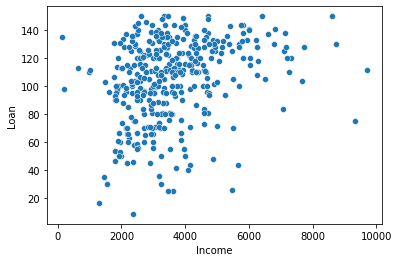

In [ ]:
sns.scatterplot(X[:,0], X[:, 1])

plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

## K-Means

### WCSS

In [ ]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
      sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  
  return sum

In [ ]:
len(X)

381

In [ ]:
import random
def kmeans(X, k):
  
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster  

### Find K value using Elbow Method

In [ ]:
cost_list = []

for k in range(1, 10):
  
  centroids, cluster = kmeans(X, k)
  
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(X, centroids, cluster)
  cost_list.append(cost)


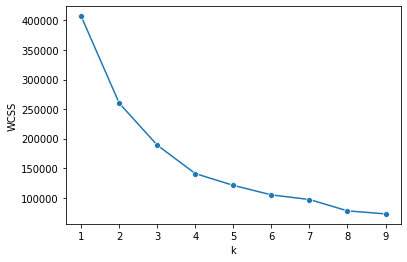

In [ ]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

WCSS doesn't reduces much after k=4, so make 4 clusters

In [ ]:
k = 4
centroids, cluster = kmeans(X, k)

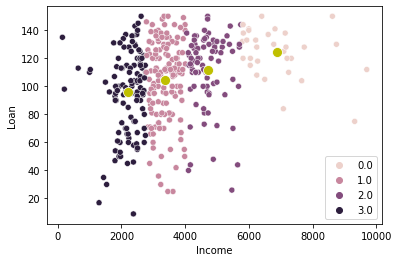

In [ ]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()